# CARS PRICING - PART1

<img alt="Super Sports Cars Wallpaper  HD Car Wallpapers" height="auto" src="http://www.hdcarwallpapers.com/download/super_sports_cars-1366x768.jpg" title="Super Sports Cars Wallpaper  HD Car Wallpapers" width="100%">

## Table of contents

1. Introduction
2. Data description
3. Import libraries and the cars dataset
4. Data visualization
5. Data cleaning
6. Conclusion

### 1. Introduction

The data come from the Kaggle dataset "Car Features and MSRP" de Kaggle. It describes almost 12 000 car models, 
sold in the USA between 1990 and 2017, with the market price (new or used) and some features.
This study aims at performing some data manipulations and define a statistical model to predict the price of a car.

### 2. Data description

In [1]:
# Make                Car Make
# Model               Car Model
# Year                Car Year (Marketing)
# Engine Fuel Type    Engine Fuel Type
# Engine HP           Engine Horse Power (HP)
# Engine Cylinders    Engine Cylinders
# Transmission Type   Transmission Type
# Driven_Wheels       Driven Wheels
# Number of Doors     Number of Doors
# Market Category     Market Category
# Vehicle Size        Size of Vehicle
# Vehicle Style       Type of Vehicle
# highway MPG         Highway MPG
# city mpg            City MPG
# Popularity          Popularity (Twitter)
# MSRP                Manufacturer Suggested Retail Price

**2.1 Explanation of MPG** 

A measure of how far a car can travel if you put just one gallon of petrol or diesel in its tank.

**2.2 Explanation on MSRP**

MSRP is the manufacturer's suggested retail price, a price recommended for the sale of an item in all retail outlets. A vendor can require retailers to sell its products at the MSRP and refuse to sell its products to a discounter if they price products below it.

• Prices retained

    ◦ for vehicles sold in 2017 (1 668 vehicles), new price suggested by the manufacturer
    ◦ for used vehicles (10 246 vehicles), edmunds.com True Market Value
    
    This difference in method could lead to a discontinuity. However we see on different examples there isn't any significant gap.

• All prices are recorded at the same time and can be compared. There is no need for inflation ajustment.

• Used car prices are floored on edmunds.com. Oldest or cheapest vehicles have a minimum price of 2000 USD (1 036 vehicles).


### 3. Import libraries and the cars dataset

#### 3.1 Librairies

In [2]:
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict

#### 3.2 Import datas

In [3]:
df = pd.read_csv("./data.csv")
pd.DataFrame(df.head(5))

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### 3.3 Data structure

In [4]:
print("The dataframe contains",df.shape[0],"rows and",df.shape[1],"columns\n")
print("The labels are",[df.columns[i] for i in range(df.shape[1])])

def display_data_type(dataframe):
    dict_type = {}
    for i in range(df.shape[1]):
        dict_type[df.columns[i]] = type(df.iloc[0,i])
    return(dict_type)

display_data_type(df)

The dataframe contains 11914 rows and 16 columns

The labels are ['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


{'Make': str,
 'Model': str,
 'Year': numpy.int64,
 'Engine Fuel Type': str,
 'Engine HP': numpy.float64,
 'Engine Cylinders': numpy.float64,
 'Transmission Type': str,
 'Driven_Wheels': str,
 'Number of Doors': numpy.float64,
 'Market Category': str,
 'Vehicle Size': str,
 'Vehicle Style': str,
 'highway MPG': numpy.int64,
 'city mpg': numpy.int64,
 'Popularity': numpy.int64,
 'MSRP': numpy.int64}

**dataframe.info()** can also be used to render same result.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
Make                 11914 non-null object
Model                11914 non-null object
Year                 11914 non-null int64
Engine Fuel Type     11911 non-null object
Engine HP            11845 non-null float64
Engine Cylinders     11884 non-null float64
Transmission Type    11914 non-null object
Driven_Wheels        11914 non-null object
Number of Doors      11908 non-null float64
Market Category      8172 non-null object
Vehicle Size         11914 non-null object
Vehicle Style        11914 non-null object
highway MPG          11914 non-null int64
city mpg             11914 non-null int64
Popularity           11914 non-null int64
MSRP                 11914 non-null int64
dtypes: float64(3), int64(5), object(8)
memory usage: 1.5+ MB


### 4. Data Visualization

#### 4.1 Average price car per year

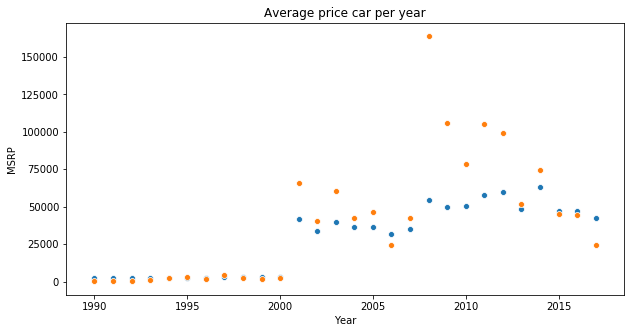

In [6]:
mean_price = pd.DataFrame({'index' : [df[['Year','MSRP']].groupby(['Year']).mean().index[i] for i in range(28)],
                         'meanprice' : [df[['Year','MSRP']].groupby(['Year']).mean().iloc[i] for i in range(28)]})
std_price = pd.DataFrame({'index' : [df[['Year','MSRP']].groupby(['Year']).std().index[i] for i in range(28)],
                         'stdprice' : [df[['Year','MSRP']].groupby(['Year']).std().iloc[i] for i in range(28)]})
df_below_2000 = df[df['Year']<=2000]


fig, ax1 = plt.subplots(figsize=(10,5))
fig.subplots_adjust(wspace = 0.05)

ax1 = sns.scatterplot(x='index', y='meanprice', data=mean_price)
ax1 = sns.scatterplot(x='index', y='stdprice', data=std_price)
ax1.set_title('Average price car per year')
ax1.set_xlabel('Year')
ax1.set_ylabel('MSRP')

plt.show()

There is a high std for year 2008. No need to treat outliers for 2009 to 2012 year.

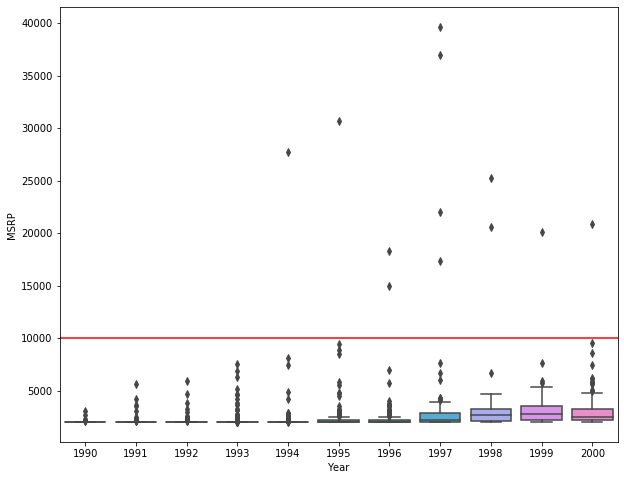

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(x="Year", y="MSRP", data=df_below_2000)
plt.axhline(y=10000, color='r')
plt.show()

Many outliers, let's get rid of above 10k USD cars.

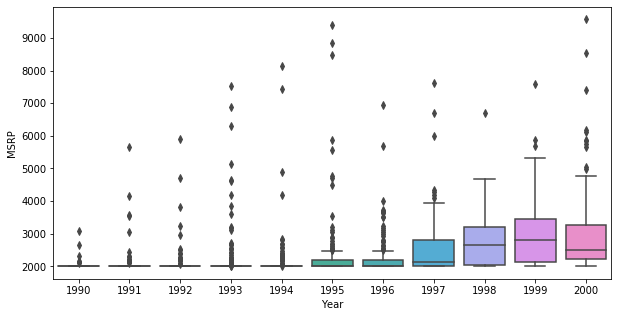

In [8]:
# Filtering
df = df.loc[((df['Year']<=2000) & (df['MSRP']< 10000)) | (df['Year']>2000)]

df_below_2000_new = df.copy()
df_below_2000_new = df_below_2000_new[df_below_2000_new['Year']<=2000]

plt.figure(figsize=(10,5))
sns.boxplot(x="Year", y="MSRP", data=df_below_2000_new)
plt.show()

In [9]:
# Reindex the dataframe
df.index = np.arange(df.shape[0])

#### 4.2 Car year distribution

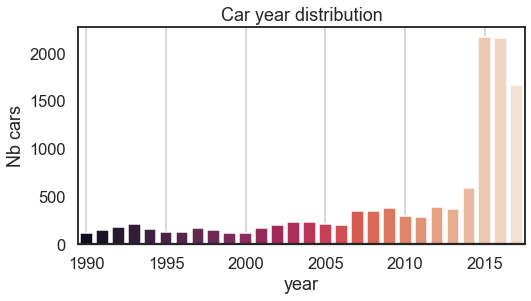

In [10]:
# Create index
dic = {1990+i : sum(df['Year']==1990+i) for i in range(28)}
x_dic = [1990 + i for i in range(28)]
y_dic = [dic[1990 + i] for i in range(28)]

# Define borders and window
sns.set(style="white", context="talk")
f, ax1 = plt.subplots(1,1,figsize=(8,4))
ax1.set_title('Car year distribution')
sns.barplot(x=x_dic, y=y_dic, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Diverging")
ax1.set_xlabel('year')
ax1.set_ylabel('Nb cars')
locs, labels = plt.xticks() 
plt.xticks([0,5,10,15,20,25],['1990', '1995', '2000', '2005', '2010', '2015'])
plt.grid(axis = 'x')
plt.show()

In [11]:
round(sum(y_dic[-3:])/sum(y_dic),2)

0.5

The dataset contains (at most) only the last three years of a model production. A model discontinuited in 2010 for example, will have data for years 2008, 2009 and 2010.
All current model will have data only for years 2015, 2016 and 2017. This explain the peaks for last years.

#### 4.3 Car brands

**What are the most represented car brands ?**

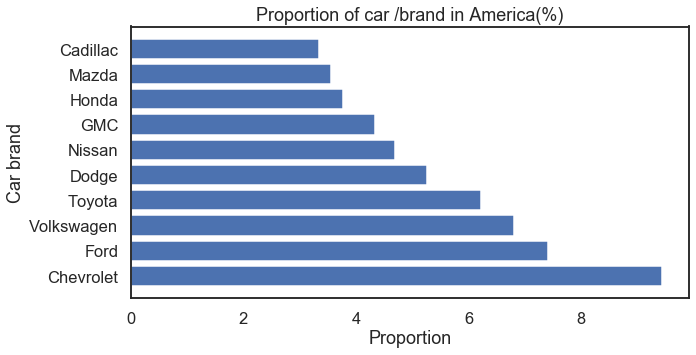

In [12]:
# Percentage of car per brand
counts = df['Make'].value_counts()*100/sum(df['Make'].value_counts())

# 9 most present labels
popular_labels = counts.index[:10]
    
# Plot
plt.figure(figsize=(10,5))
plt.barh(popular_labels, width=counts[:10])
plt.title('Proportion of car /brand in America(%)')
plt.xlabel('Proportion')
plt.ylabel('Car brand')
plt.show()

In [13]:
print("Over",len(counts),"different car brands, the 10 most recurrent car brands in that dataset\nrepresents",sum(counts[:10]),"% of the total number of cars !")

Over 48 different car brands, the 10 most recurrent car brands in that dataset
represents 54.789111073769114 % of the total number of cars !


**WARNING**

Brand proportions are only for the dataset. They do not reflect vehicle sales on the market. A brand with many different models will obtain a higher proportion than another one with fewer models.

**What is the average price among the 9 most represented brands ?**

In [14]:
prices = df[['Make','MSRP']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                    MSRP
Make                    
Chevrolet   28350.385574
Dodge       22390.059105
Ford        27399.266742
GMC         30493.299029
Honda       26674.340757
Mazda       20039.382979
Nissan      28583.431900
Toyota      29105.356757
Volkswagen  28102.380717


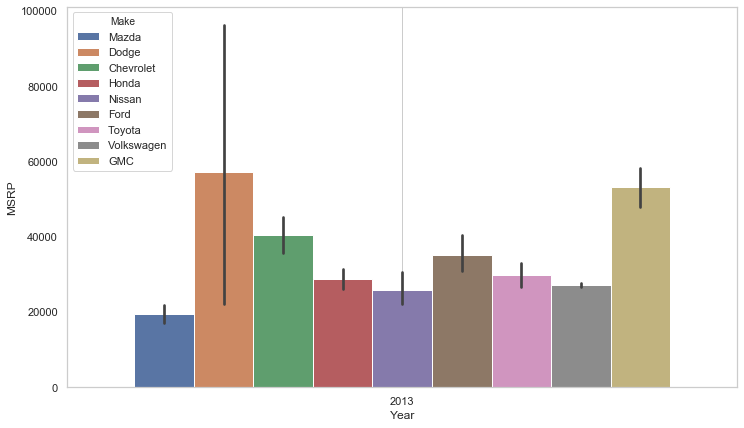

In [67]:
plt.figure(figsize=(12,7))
sns.barplot(x="Year", y="MSRP", hue='Make', data=df[['Make','Year','MSRP']].loc[((df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')) & (df['Year']==2013)])
plt.grid()
plt.show()

What are these outliers ? It can be collection cars or overrated ones. I don't suppress any outlier here because i only chosed the 10 most recurrent cars.

#### 4.4 Engine fuel type proportion

Is fuel type proportion changing between all the previous years and the last three years ?
We can assume that engine fuel types current proportions would be quite different from only a couple of years ago, and from the whole dataset.

In [16]:
#group categories (unleaded, flex-fuel, diesel, electric, natural gas)
df.loc[df['Engine Fuel Type']=='regular unleaded','Engine Fuel Type'] = 'unleaded'
df.loc[df['Engine Fuel Type']=='premium unleaded (required)','Engine Fuel Type'] = 'unleaded'
df.loc[df['Engine Fuel Type']=='premium unleaded (recommended)','Engine Fuel Type'] = 'unleaded'

df.loc[df['Engine Fuel Type']=='flex-fuel (unleaded/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (premium unleaded required/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (premium unleaded recommended/E85)','Engine Fuel Type'] = 'flex-fuel'
df.loc[df['Engine Fuel Type']=='flex-fuel (unleaded/natural gas)','Engine Fuel Type'] = 'flex-fuel'


eng = df.loc[(df['Year']!=2017) & (df['Year']!=2016) & (df['Year']!=2015),'Engine Fuel Type'].value_counts()
eng2 = df.loc[(df['Year']==2017) | (df['Year']==2016) | (df['Year']==2015),'Engine Fuel Type'].value_counts()

print(eng)
print(eng2)

#Proportion before 2015
prop_eng_ft = pd.DataFrame({'Engine Fuel Type' : ['unleaded',
                                                'flex-fuel',
                                                'diesel',
                                                'electric'
                                                ],
                            'Proportion': [eng[i]*100/sum(eng) for i in range(len(eng))]})

#Proportion after 2015
prop_eng_ft2 = pd.DataFrame({'Engine Fuel Type' : ['unleaded',
                                                'flex-fuel',                                                 
                                                'electric',
                                                'diesel',
                                                'natural gas'],
                            'Proportion all dataset': [eng2[i]*100/(df.shape[0]) for i in range(len(eng2))],
                            'Proportion 3years': [eng2[i]*100/sum(eng2) for i in range(len(eng2))]})

unleaded     5519
flex-fuel     325
diesel         45
electric       15
Name: Engine Fuel Type, dtype: int64
unleaded       5173
flex-fuel       660
diesel          109
electric         51
natural gas       2
Name: Engine Fuel Type, dtype: int64


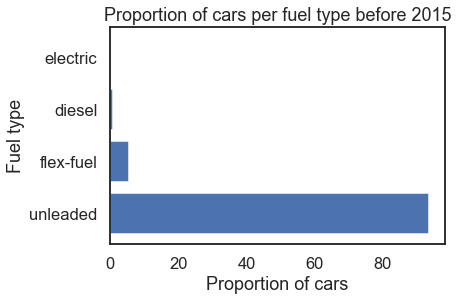

In [17]:
plt.barh(prop_eng_ft['Engine Fuel Type'], width = prop_eng_ft['Proportion'])
plt.title('Proportion of cars per fuel type before 2015')
plt.xlabel('Proportion of cars')
plt.ylabel('Fuel type')
plt.show()

Let's have a look of 2015,2016 and 2017 cars to have an insight of the current car market

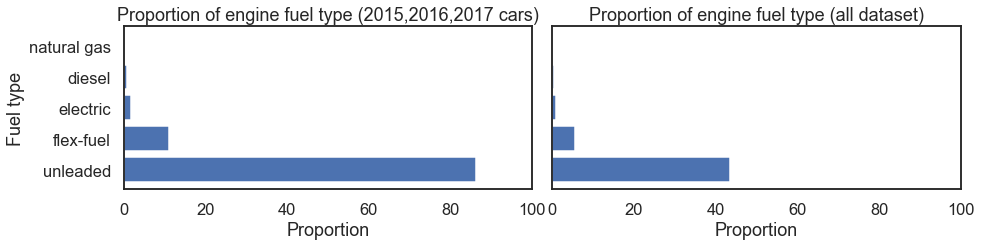

In [18]:
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2,sharey= True,figsize=(15,3))
fig.subplots_adjust(wspace = 0.05)

ax1.barh(prop_eng_ft2['Engine Fuel Type'], width = prop_eng_ft2['Proportion 3years'])
ax1.set_title('Proportion of engine fuel type (2015,2016,2017 cars)')
ax1.set_ylabel('Fuel type')
ax1.set_xlabel('Proportion')
ax1.set_xlim([0,100])
ax2.barh(prop_eng_ft2['Engine Fuel Type'], width = prop_eng_ft2['Proportion all dataset'])
ax2.set_title('Proportion of engine fuel type (all dataset)')
ax2.set_xlim([0,100])
ax2.set_xlabel('Proportion')

plt.show()

#### 4.5 Correlation matrix

Dependancy between variables ?

In [19]:
df.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.352181,-0.040454,0.261653,0.257253,0.197453,0.072720,0.227492
Engine HP,0.352181,1.000000,0.780594,-0.103032,-0.407086,-0.439698,0.037297,0.662124
Engine Cylinders,-0.040454,0.780594,1.000000,-0.139359,-0.621365,-0.600623,0.041561,0.531602
Number of Doors,0.261653,-0.103032,-0.139359,1.000000,0.117408,0.120084,-0.048763,-0.127250
highway MPG,0.257253,-0.407086,-0.621365,0.117408,1.000000,0.886808,-0.021407,-0.160295
city mpg,0.197453,-0.439698,-0.600623,0.120084,0.886808,1.000000,-0.003469,-0.157851
Popularity,0.072720,0.037297,0.041561,-0.048763,-0.021407,-0.003469,1.000000,-0.048505
MSRP,0.227492,0.662124,0.531602,-0.127250,-0.160295,-0.157851,-0.048505,1.000000


**High correlation between**
    - Engine cylinders & Engine HP
    - highway mpg & City mpg
    
The more cylinders there are, the more poverful the car is.

**High anticorrelation**
    - Engine cylinders & highway mpg
    
Highway mpg / Engine Cylinders have a strong negative correlation with highway and city MPG because lower MPG figures mean higher fuel consumption.

Only numerical features are selectionned to plot correlation matrix. How to select them ?

In [71]:
# The function corr() automatically take into account type of feature and keep only numerical ones
list_numeric = [(type(df.iloc[0,i]) == np.int64 or type(df.iloc[0,i]) == np.float64) for i in range(df.shape[1])]

list_numeric = [i*j for i, j in zip(df.columns, list_numeric)]

def clean(liste):
    resu = []
    for i in range(len(liste)):
        if (liste[i]!=''):
            resu.append(liste[i])
    return(resu)
    
print(clean(list_numeric))

['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP']


In [21]:
print('We just figured out that : list(df.describe().columns) gives the same result')
print(list(df.describe().columns), '\nin just one line...')

We just figured out that : list(df.describe().columns) gives the same result
['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP'] 
in just one line...


The saying "practise makes perfect" also applies in computer science

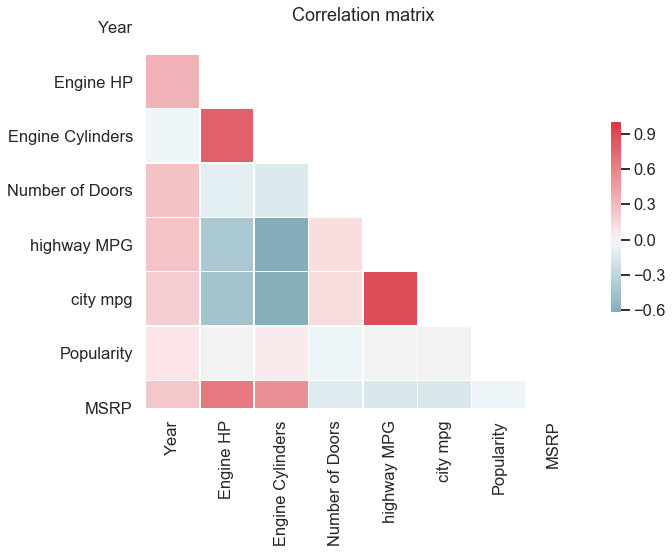

In [22]:
corr = df.corr()
# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)
# return the indices for the upper triangle of an (n,m) array
mask[np.triu_indices_from(mask)] = True

sns.set_style("white")
f, ax = plt.subplots(figsize=(11,7))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, vmax = 1, center = 0, linewidths = .5, cbar_kws = {"shrink": .5})
plt.show()

Previous correlations are not high enough to drop any feature in this dataset and as there are not that many features.

#### 4.6 Engine cylinders histogram

C:\Users\HOME\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HOME\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


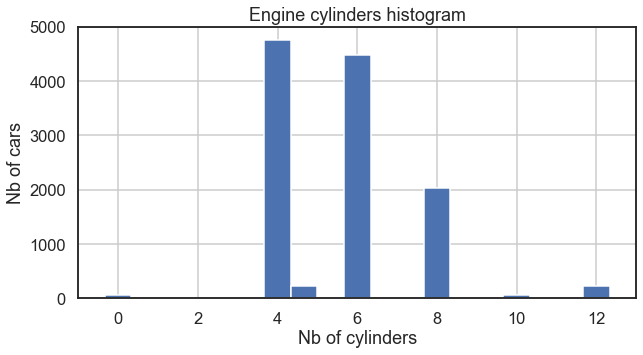

In [23]:
plt.figure(figsize=(10,5))
plt.hist(df['Engine Cylinders'].values, bins = 24, align = 'left')
plt.title('Engine cylinders histogram')
plt.xlabel('Nb of cylinders')
plt.ylabel('Nb of cars')
plt.xlim([-1,13])
plt.ylim([0,5000])
plt.grid()
plt.show()

#### 4.7 Transmission type pie

In [24]:
df['Transmission Type'].value_counts()

AUTOMATIC           8261
MANUAL              2928
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: Transmission Type, dtype: int64

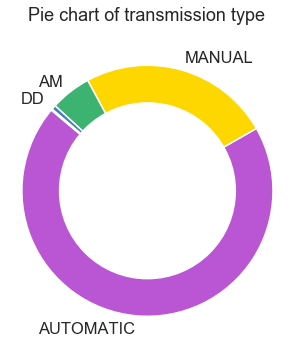

   AUTOMATIC :           69.4%
   MANUAL :              24.6%
   AM : AUTOMATED MANUAL 5.3%
   DD : DIRECT DRIVE     0.7% 



In [25]:
##### Data to plot
labels = ['AUTOMATIC', 'MANUAL', 'AM', 'DD', '']
sizes = [8266,2935,626,68,19]
colors = ['mediumorchid', 'gold', 'mediumseagreen', 'steelblue','khaki']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of transmission type').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors, startangle=140)
#plt.legend()
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()
print('   AUTOMATIC :           69.4%\n   MANUAL :              24.6%\n   AM : AUTOMATED MANUAL 5.3%\n   DD : DIRECT DRIVE     0.7% \n')

Almost 70% of cars are automatic. For decades automatic transmission have been considered much more convenient in the USA than in Europe. The American car industry was more competitive, with more powerful engines and cheap fuel.

#### 4.8 Driven wheels pie

In [26]:
df['Driven_Wheels'].value_counts()

front wheel drive    4787
rear wheel drive     3363
all wheel drive      2353
four wheel drive     1399
Name: Driven_Wheels, dtype: int64

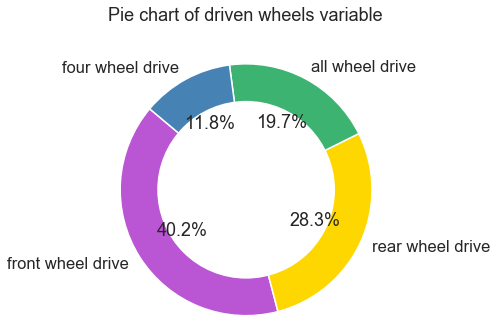

In [27]:
# Data to plot
labels = ['front wheel drive', 'rear wheel drive', 'all wheel drive', 'four wheel drive']
sizes = [4787,3371,2353,1403]
colors = ['mediumorchid', 'gold', 'mediumseagreen', 'steelblue']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of driven wheels variable').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()

#### 4.9 Number of doors

In [28]:
# Proportion of number of doors
round(df['Number of Doors'].value_counts()*100/sum(df['Number of Doors'].value_counts()),2)

4.0    70.22
2.0    26.46
3.0     3.32
Name: Number of Doors, dtype: float64

3 doors vehicles are mainly vans.

#### 4.10 Vehicle size pie

In [29]:
round(df['Vehicle Size'].value_counts()*100/sum(df['Vehicle Size'].value_counts()),2)

Compact    39.93
Midsize    36.74
Large      23.33
Name: Vehicle Size, dtype: float64

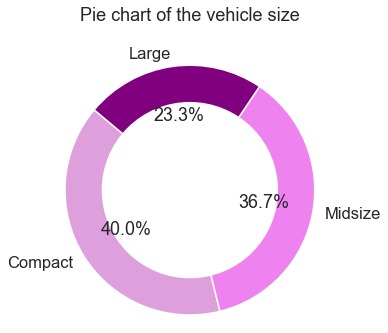

In [30]:
# Data to plot
labels = ['Compact', 'Midsize', 'Large']
sizes = [4764,4373,2777]
colors = ['plum', 'violet', 'purple']
# Plot
plt.figure(figsize=(5,5))
plt.title('Pie chart of the vehicle size').set_position([0.5,1.1])
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=140)
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('equal')

plt.show()

#### 4.11 Popularity vs vehicle size

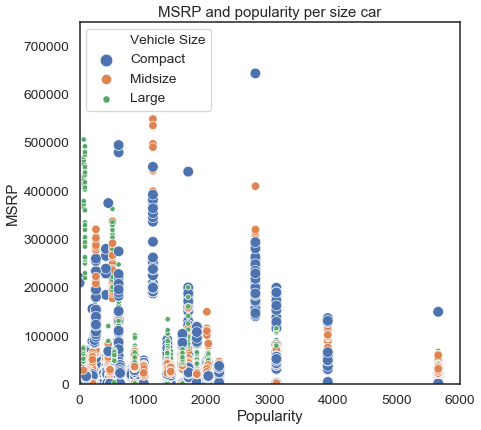

In [31]:
# Create data
g1 = (df.loc[np.where(df['Vehicle Size']=='Compact')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Compact')[0],'MSRP'])
g2 = (df.loc[np.where(df['Vehicle Size']=='Large')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Large')[0],'MSRP'])
g3 = (df.loc[np.where(df['Vehicle Size']=='Midsize')[0],'Popularity'],df.loc[np.where(df['Vehicle Size']=='Midsize')[0],'MSRP'])
 
data = (g1, g2, g3)
colors = ("green", "red", "orange")
groups = ("Compact cars", "Large cars", "Midsize cars") 

# Group popularity by make
df_scatter = df.copy()
df_scatter = df_scatter[['Make','Popularity','Vehicle Size','MSRP']]

# Create plot
fig = plt.figure(figsize=(18,8), dpi = 60)
ax = fig.add_subplot(1, 2, 1)

# for data, color, group in zip(data, colors, groups):
#     x, y = data
#     ax.scatter(x, y, alpha=0.8, c=color, edgecolors='none', s=30, label=group)

ax = sns.scatterplot(x="Popularity", y="MSRP",
                      hue="Vehicle Size", size="Vehicle Size",
                      data=df)
    
plt.title('MSRP and popularity per size car')
plt.legend(loc=2)
plt.xlabel('Popularity')
plt.ylabel('MSRP')
plt.ylim([0,750000])
plt.xlim([0,6000])

plt.show()

Large car are less likely to be typed in twitter 

#### 4.12 Distribution of MSRP

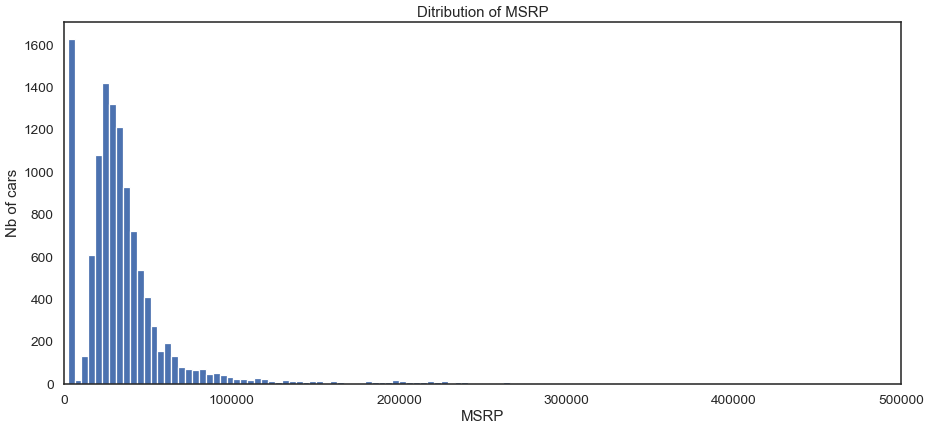

In [32]:
fig = plt.figure(figsize=(18,8), dpi = 60)
plt.hist(df['MSRP'].values, bins = 500)
plt.title('Ditribution of MSRP')
plt.xlabel('MSRP')
plt.ylabel('Nb of cars')
plt.xlim([0,500000])
plt.show()

The 2000 USD peak shows the floor price in the dataset.

In [33]:
print(sum(df['MSRP']>400000),"cars worth more than 400k$")
print(sum(df['MSRP']>200000),"cars worth more than 200k$")
print(sum(df['MSRP']>50000),"cars worth more than 50k$")
print("Most expensive car costs", max(df['MSRP']))
print("There are",sum(df['MSRP']<5000),"cars worth less than 5k$")

46 cars worth more than 400k$
279 cars worth more than 200k$
1999 cars worth more than 50k$
Most expensive car costs 2065902
There are 1611 cars worth less than 5k$


We can see that there are a lot of cars sold for less than 5k$, Are these cars old ?

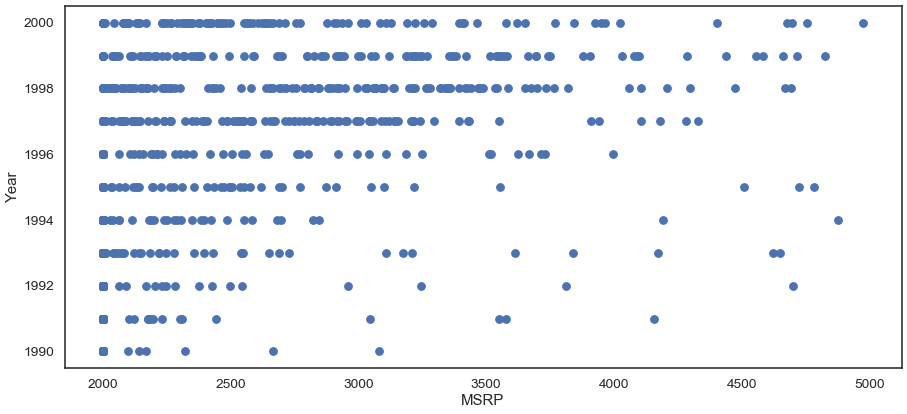

Correlation between MSRP and Year is :  0.22749213781864933
Correlation between MSRP and Year for below 5k$ cars is : 0.45302490451215865


In [34]:
x = df.loc[df['MSRP']<5000,'MSRP']
y = df.loc[df['MSRP']<5000,'Year']
plt.figure(figsize=(18,8), dpi = 60)
plt.scatter(x,y)
plt.xlabel('MSRP')
plt.ylabel('Year')
plt.show()

print("Correlation between MSRP and Year is : ",np.corrcoef(df['MSRP'],df['Year'])[0][1])
print("Correlation between MSRP and Year for below 5k$ cars is :",np.corrcoef(x,y)[0][1])

Given the graph, we have only cars from 1990 to 2000, They are quite old then. Besides, MSRP explain twice as much better Year of car variance. The price is spreading to 5kd as years increase.
Problem : A lot of observations may be concentrated so that the proportion of cars whose price are between 3kd and 5kd is not significant.

**Is that true ?**

In [35]:
df_MSRP_simplified = df_below_2000_new.copy()
df_MSRP_simplified = df_MSRP_simplified[df_MSRP_simplified['MSRP']<=5000]
df_MSRP_simplified.loc[(df_MSRP_simplified['MSRP']>=2000) & (df_MSRP_simplified['MSRP']<3000),'MSRP'] = 2500
df_MSRP_simplified.loc[(df_MSRP_simplified['MSRP']>=3000) & (df_MSRP_simplified['MSRP']<4000),'MSRP'] = 3500
df_MSRP_simplified.loc[(df_MSRP_simplified['MSRP']>=4000) & (df_MSRP_simplified['MSRP']<5000),'MSRP'] = 4500
df_MSRP_simplified['MSRP'] = df_MSRP_simplified['MSRP'].apply(lambda x: str(x))
df_MSRP_simplified.loc[df_MSRP_simplified['MSRP']=='2500','MSRP'] = '2k USD - 3k USD'
df_MSRP_simplified.loc[df_MSRP_simplified['MSRP']=='3500','MSRP'] = '3k USD - 4k USD'
df_MSRP_simplified.loc[df_MSRP_simplified['MSRP']=='4500','MSRP'] = '4k USD - 5k USD'

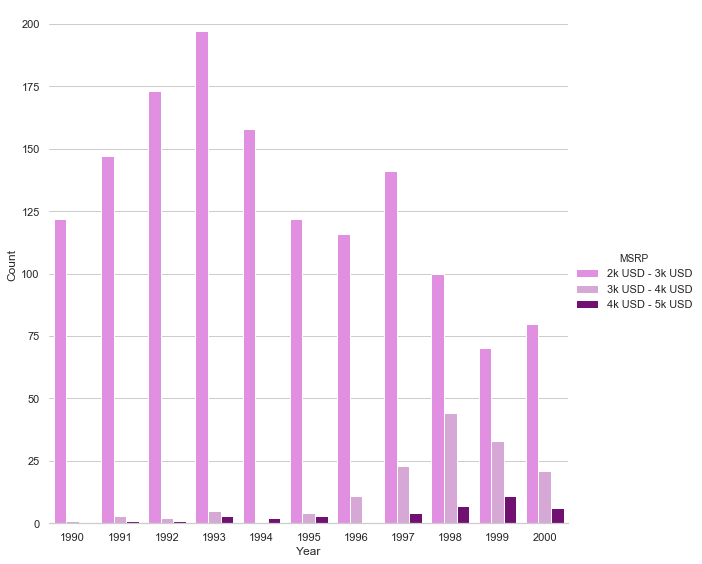

In [36]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
colors = ['violet','plum', 'purple']

sns.catplot(x="Year", hue="MSRP", data=df_MSRP_simplified,
                height=8, kind="count", palette=colors).despine(left=True).set_ylabels("Count")

plt.show()

First of all, given the first graph, we couldn't really say how many cars were classified per year. On the previous graph, we can affirm that the number is quite constant. Then, the proportion of 2k USD - 3k USD is decreasing as the two other categories get higher proportions.

On a whole, if 2k USD seems to be the bottom price for old cars, the price increases logically with years.

#### 4.13 Clear memory

In [37]:
# Clean no more used variables
del mean_price,std_price,df_below_2000,df_below_2000_new, df_MSRP_simplified, counts, popular_labels

### 5. Data cleaning

#### 5.1 Which features are affected ?

In [38]:
# Copy of the dataset
df_to_clean = df.copy()
print(df_to_clean.describe().columns)

Index(['Year', 'Engine HP', 'Engine Cylinders', 'Number of Doors',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


Let's check how many missing values there are on the whole dataset.

In [39]:
# Define function missing_values which takes a dataframe as input and return missing values per feature of the dataframe
def missing_values(dataframe):
    return(len(dataframe) - dataframe.count())

missing_values(df_to_clean)

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

As expected, we can see that Engine cylinders have missing values, so do 4 other features

In [40]:
index = missing_values(df_to_clean)>0
print("The feature which contain missing values are",[df.columns[index][i] for i in range(sum(index))])

The feature which contain missing values are ['Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category']


#### 5.2 First approach : drop rows which contain NA values

In [41]:
rows_with_missing = [rows for rows in range(df_to_clean.shape[0])
                                 if df_to_clean.loc[rows,:].isnull().any()]
df_drop_rows_with_na = df_to_clean.drop(rows_with_missing).copy()

The easy way... But in most cases, there are less than 10% missing values on a given feature. Dropping it can affect the quality of the model. One solution consists in imputing these missing values one by one when possible

#### 5.3 Second approach : input properly NA values

As few columns have NA values ('Engine Fuel Type', 'Engine HP', 'Engine Cylinders', 'Number of Doors', 'Market Category') it is possible to handle these NA manually Otherwise, a automatic input method would have been used

##### 5.3.1 Engine Fuel Type

In [42]:
print(df_to_clean['Engine Fuel Type'].value_counts())
print(sum(df_to_clean['Engine Fuel Type'].value_counts()))

unleaded       10692
flex-fuel        985
diesel           154
electric          66
natural gas        2
Name: Engine Fuel Type, dtype: int64
11899


Encoding Engine Fuel Type : how does it work ?

In [43]:
print(df_to_clean['Engine Fuel Type'].unique())
engine_fuel_type_mapping = {label:idx for idx,label in enumerate(df_to_clean['Engine Fuel Type'].unique())}
print("\n",engine_fuel_type_mapping)
# Apply once
df_to_clean['Engine Fuel Type'] = df_to_clean['Engine Fuel Type'].map(engine_fuel_type_mapping)

['unleaded' 'flex-fuel' 'diesel' 'electric' 'natural gas' nan]

 {'unleaded': 0, 'flex-fuel': 1, 'diesel': 2, 'electric': 3, 'natural gas': 4, nan: 5}


In [44]:
indexes_eft = np.where(df_to_clean.loc[:,'Engine Fuel Type']==5)
df_to_clean.loc[indexes_eft[0][0]:(indexes_eft[0][0]+5),:]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11309,Suzuki,Verona,2004,5,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,17199
11310,Suzuki,Verona,2004,5,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,20199
11311,Suzuki,Verona,2004,5,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,17,481,18499
11312,Suzuki,Verona,2005,0,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,19349
11313,Suzuki,Verona,2005,0,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,21049
11314,Suzuki,Verona,2005,0,155.0,6.0,AUTOMATIC,front wheel drive,4.0,NaN,Midsize,Sedan,25,18,481,17549


As the Fuel Type is not given, it is complicated to guess as each model may have diesel or fuel version ... given the 2005 model, let's chose the regular unleaded option

In [45]:
df_to_clean.loc[indexes_eft[0],'Engine Fuel Type'] = 1

In [46]:
# Check the 10 category which corresponds to NA has been removed
print(df_to_clean['Engine Fuel Type'].unique())

[0 1 2 3 4]


Goodbye category 5 ! No more NA for Engine Fuel Type

##### 5.3.2 Engine HP

Keep positions of observations in the dataframe where the value is NaN

In [47]:
# Index of each NA values in 'Engine HP'
indexes_engine_hp = np.where(df_to_clean['Engine HP'].isnull())
print("Indexes of each NA in 'Engine HP'",indexes_engine_hp[0])
# Numbers of NA (does it fit with the dataframe ?)
print(len(indexes_engine_hp[0]))

# Mean inputation
for i in range(len(indexes_engine_hp[0])):
    df_to_clean.loc[indexes_engine_hp[0][i],'Engine HP'] = np.mean(df_to_clean['Engine HP'])

Indexes of each NA in 'Engine HP' [ 539  540  541 2905 2906 2907 2908 4199 4200 4201 4202 4701 4702 4781
 4785 4794 4910 4911 4912 4913 4914 4915 5774 5821 5826 5827 5829 5835
 5836 6381 6382 6383 6384 6385 6386 6387 6388 6389 6390 6574 6904 6906
 6912 6914 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928
 6929 6930 6931 6932 6933 6934 8368 8369 9844 9845 9846 9847 9848]
69


Mean input is more appropriate because there are not really outliers for that feature (otherwise median would have been more suitable).

##### 5.3.3 Engine Cylinders

tenter un input en utilisant la correlation (demander au prof)

In [48]:
print(df_to_clean['Engine Cylinders'].value_counts())
print(sum(df_to_clean['Engine Cylinders'].value_counts()))

4.0     4752
6.0     4481
8.0     2027
12.0     230
5.0      225
10.0      68
0.0       56
3.0       30
16.0       3
Name: Engine Cylinders, dtype: int64
11872


In [49]:
indexes_engine_cyl = np.where(df_to_clean['Engine Cylinders'].isnull())
print('There are',len(indexes_engine_cyl[0]),'missing values as expected')

There are 30 missing values as expected


In [50]:
display_cars = pd.DataFrame(df_to_clean.loc[indexes_engine_cyl[0],['Make','Model']].values, columns = ['Make','Model'])
print(display_cars.head(20))

          Make    Model
0    Chevrolet  Bolt EV
1    Chevrolet  Bolt EV
2   Volkswagen   e-Golf
3   Volkswagen   e-Golf
4   Volkswagen   e-Golf
5   Volkswagen   e-Golf
6   Mitsubishi   i-MiEV
7   Mitsubishi   i-MiEV
8   Mitsubishi   i-MiEV
9       Toyota  RAV4 EV
10       Mazda     RX-7
11       Mazda     RX-7
12       Mazda     RX-7
13       Mazda     RX-8
14       Mazda     RX-8
15       Mazda     RX-8
16       Mazda     RX-8
17       Mazda     RX-8
18       Mazda     RX-8
19       Mazda     RX-8


In [51]:
# Solution to reduce redundancy
list(display_cars.groupby(['Make','Model']).groups.keys())

[('Chevrolet', 'Bolt EV'),
 ('Mazda', 'RX-7'),
 ('Mazda', 'RX-8'),
 ('Mitsubishi', 'i-MiEV'),
 ('Toyota', 'RAV4 EV'),
 ('Volkswagen', 'e-Golf')]

To input missing values, I checked directly to any trustworthy website.

__Chevrolet bolt EV__:
<br>Car with 100% electric motor -> no cylinder
<br>https://www.auto123.com/fr/vehicules-neufs/caracteristiques/chevrolet/bolt-ev/2017/base/lt/#mechanical

__Mazda RX__:
<br>https://www.lacentrale.fr/fiche-technique-voiture-mazda-rx_8-231-2013.html
<br>2 cylinders

__Volkswagen__, __Mitsubishi__, __Toyota__ : no cylinder

In [52]:
df_to_clean.loc[indexes_engine_cyl[0][0:10],'Engine Cylinders'] = 0 
df_to_clean.loc[indexes_engine_cyl[0][10:],'Engine Cylinders'] = 2 

##### 5.3.4 Number of Doors

There are only 6 missing values. Let's check on the internet again the number of doors for each car.

In [53]:
indexes_nb_doors = np.where(df_to_clean['Number of Doors'].isnull())
df_to_clean.loc[indexes_nb_doors]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
4662,Ferrari,FF,2013,0,651.000000,12.0,AUTOMATED_MANUAL,all wheel drive,NaN,"Exotic,High-Performance",Large,Coupe,16,11,2774,295000
6926,Tesla,Model S,2016,3,249.397363,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,105,102,1391,79500
6927,Tesla,Model S,2016,3,249.397363,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,101,98,1391,66000
6928,Tesla,Model S,2016,3,249.397363,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,High-Performance",Large,Sedan,105,92,1391,134500
6929,Tesla,Model S,2016,3,249.397363,0.0,DIRECT_DRIVE,rear wheel drive,NaN,"Exotic,Performance",Large,Sedan,100,97,1391,74500
6930,Tesla,Model S,2016,3,249.397363,0.0,DIRECT_DRIVE,all wheel drive,NaN,"Exotic,Performance",Large,Sedan,107,101,1391,71000


__Ferrari FF__:
<br>https://en.wikipedia.org/wiki/Ferrari_FF
<br>Contains 3 doors

__Tesla Model S__:
<br>https://www.tesla.com/models
<br>Contains 5 doors

In [54]:
df_to_clean.loc[indexes_nb_doors[0][0],'Number of Doors'] = 3
df_to_clean.loc[indexes_nb_doors[0][1:],'Number of Doors'] = 5

##### 5.3.5 Market Category

In [55]:
df_to_clean.loc[np.where(df_to_clean['Market Category'].isnull())[0],'Market Category'] = 'No category'
# 5 most frequent categories
df_to_clean['Market Category'].value_counts().head(5)

No category           3742
Crossover             1110
Flex Fuel              872
Luxury                 851
Luxury,Performance     673
Name: Market Category, dtype: int64

Now all the missing values are inputed, let's check the dataframe

In [56]:
missing_values(df_to_clean)

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [57]:
df_to_clean.to_csv('cars_cleaned.csv')

## 6. Conclusion

The data are ready, let's do some Machine Learning now

See you in part2

### Bibliography

**Dataset** : https://www.kaggle.com/CooperUnion/cardataset and https://www.edmunds.com/

# End